In [1]:
import methyltree 
import pandas as pd
import scanpy as sc
import os
import numpy as np
from matplotlib import pyplot as plt
import cospar as cs
cs.settings.set_figure_params()
pd.options.display.max_rows = 100

/Users/shouwen/opt/miniconda3/envs/CoSpar_test/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (5.2.0)/charset_normalizer (None) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [4]:
methyltree

<module 'methyltree' from '/Users/shouwen/Documents/packages/MethylTree_public/methyltree/__init__.py'>

# Instruction

The demo data is stored in the `raw_data` folder, which contains the cell-by-region methylation rate values in `raw_data/DARLIN_HSC/test_data.tsv.gz`
and the annotation for each cell_id `sample_sheet.tsv.gz`. 

# Load the methylation rate data and generate annadata

In [3]:
current_directory =os.getcwd()
if 'test' in current_directory:
    print('Run test data') # The test data is a subsampled dataset from our DARLIN paper, associated with LL731 mouse.

    df_new2=pd.read_csv('raw_data/DARLIN_HSC/test_data.tsv.gz',compression='gzip',sep='\t').rename(columns={'cell_id':'index'})
    print(df_new2.head())

    df_out=df_new2.pivot(index='index',columns='genomic_region_id',values='value')
    adata=sc.AnnData(df_out) #This adata has not annotation yet. We will use the df_sample from raw_data folder to annotate this object later


    data_path='raw_data/DARLIN_HSC' # this path has the sample_sheet.tsv.gz file, which contains all the annotations
    out_dir='data/data'
    save_data_des=None
    clone_key='large_clone_id'
else:
    print('Run real data')
    data_path=current_directory
    out_dir=f'{data_path}/out_dir'
    
    # less likely to change
    selected='all'
    source='met'
    min_coverage=2 # this is the minimum number of cells that are acceptable
    
    ## to be changed
    exclude_sex=0
    read_cutoff=1
    groupby='clone_id'
    annotation='neutral_thresh_DARLIN_HSC_BM_0.66_0.92' 
    clone_key='inferred_clone' #'cell_type'

    save_data_des=f'{groupby}_{selected}_{annotation}_readcutoff{read_cutoff}_minCov{min_coverage}_{source}_ExcludeSex{exclude_sex}'
    adata=sc.read(f'{out_dir}/{save_data_des}.h5ad')
adata

Run test data
             index          genomic_region_id  value
0  LL731_P1_DNA_A6  chr10_100008499_100010500   83.0
1  LL731_P1_DNA_B3  chr10_100008499_100010500   67.0
2  LL731_P1_DNA_C5  chr10_100008499_100010500   67.0
3  LL731_P1_DNA_C6  chr10_100008499_100010500   67.0
4  LL731_P1_DNA_D8  chr10_100008499_100010500   60.0


AnnData object with n_obs × n_vars = 71 × 107383

In [4]:
data_des='test_data'
figure_path='data/figure'
os.makedirs(out_dir,exist_ok=True)
os.makedirs(figure_path,exist_ok=True)

In [5]:
df_sample=methyltree.hf.load_sample_info(data_path)
df_sample.head()

,sample,lineage,stage,nCG,met_rate,nGC,corr_met,shared_sites,HQ,celltype,UMAP_rna_x,UMAP_rna_y,large_clone_id,inferred_clones,inferred_clone
0,LL731_P1_DNA_A1,BM_HSC_0,BM_HSC_0,1578270.0,0.766563,14385539.0,0.916792,41.0,True,BM_HSC_0,13.722864,13.104034,clone_18,clone_12,clone_0
1,LL731_P1_DNA_A4,BM_HSC_0,BM_HSC_0,1581872.0,0.774810,14395691.0,0.915121,41.0,True,BM_HSC_0,11.456920,12.274448,clone_25,clone_0,clone_14
2,LL731_P1_DNA_A6,BM_HSC_0,BM_HSC_0,1443080.0,0.770401,13109403.0,0.912740,41.0,True,BM_HSC_0,11.788898,13.383047,clone_22,clone_26,clone_24
3,LL731_P1_DNA_A8,BM_HSC_0,BM_HSC_0,1281389.0,0.767704,11669548.0,0.911345,41.0,True,BM_HSC_0,14.298115,14.677113,clone_0,clone_8,clone_0
4,LL731_P1_DNA_A10,BM_HSC_1,BM_HSC_1,1067036.0,0.773752,9728259.0,0.915459,41.0,True,BM_HSC_1,16.718924,14.012350,clone_5,clone_5,clone_5


# MethyTree analysis

This function will merge the df_sample and adata together because update_sample_info=True. This is our main function.

Module:

1, Data loading

2, X_similarity correction to remove noise (`similarity_correction=True`)

3, X_similarity z-score to enhance lineage signal
    (`remove_celltype_signal=False`)

4, Lineage tree inference or cell state ordering
    (`order_method=['NJ','UPGMA','HierarchicalClustering']`)

5, Improve lineage tree with stochastic optimization
    (`optimize_tree=False,optimize_background_cutoff=0.8`)

6, Identify putative clones with thresholding. Very simple. Not very well.
    (`identify_clones=False,InfClone_threshold=0.5,InfClone_signal_noise=True`)

7, Clean up ordered_clone_array and compute lineage accuracy

8, Visualize the X_similarity
    (`replot_similarity_matrix=False`)

9, Memory analysis

10, Coarse-grain analysis (not as good as the pseudo-cell analysis)

11, Accuracy by depth

use provided adata
adata shape:  (71, 107383)
update sample
X_similarity_correlation_raw not found in adata.obsm
re-compute similarity matrix
Use correlation for similarity
duration: 3.776087999343872
correct similarity: outer loop 0;  current epsilon 0.05
Use fast/analytical correction method


  0%|▏                                             | 4/1000 [00:00<00:00, 1360.90it/s]


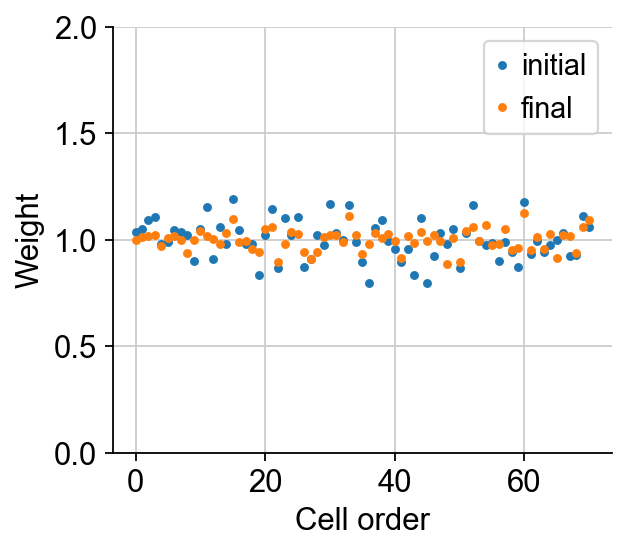

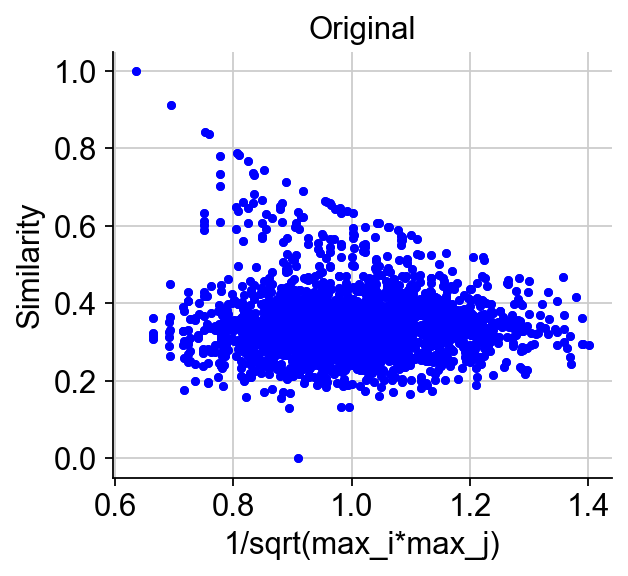

std: 0.028
similarity normalize----


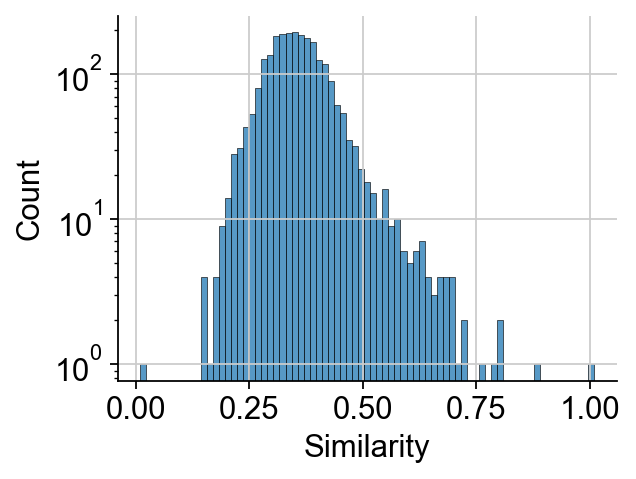

Reconstruction method: UPGMA
      clone  clone_size  accuracy  continuity  entropy  wassertein  \
0   clone_0          12  0.833333    0.833333  0.22781    0.166667   
1   clone_1           8  1.000000    1.000000  0.00000    0.000000   
2  clone_10           3  1.000000    1.000000  0.00000    0.000000   
3  clone_11           2  1.000000    1.000000  0.00000    0.000000   
4  clone_12           2  1.000000    1.000000  0.00000    0.000000   

   random_accuracy  random_continuity  random_entropy  random_wassertein  
0         0.166667           0.258333        0.894211           0.625000  
1         0.112500           0.212500        0.938521           0.662500  
2         0.066667           0.366667        0.957938           0.633333  
3         0.100000           0.550000        0.900000           0.450000  
4         0.000000           0.500000        1.000000           0.500000  
mean continuity: 0.9682539682539684
mean accuracy: 0.9444444444444445
mean entropy: 0.05846712666551

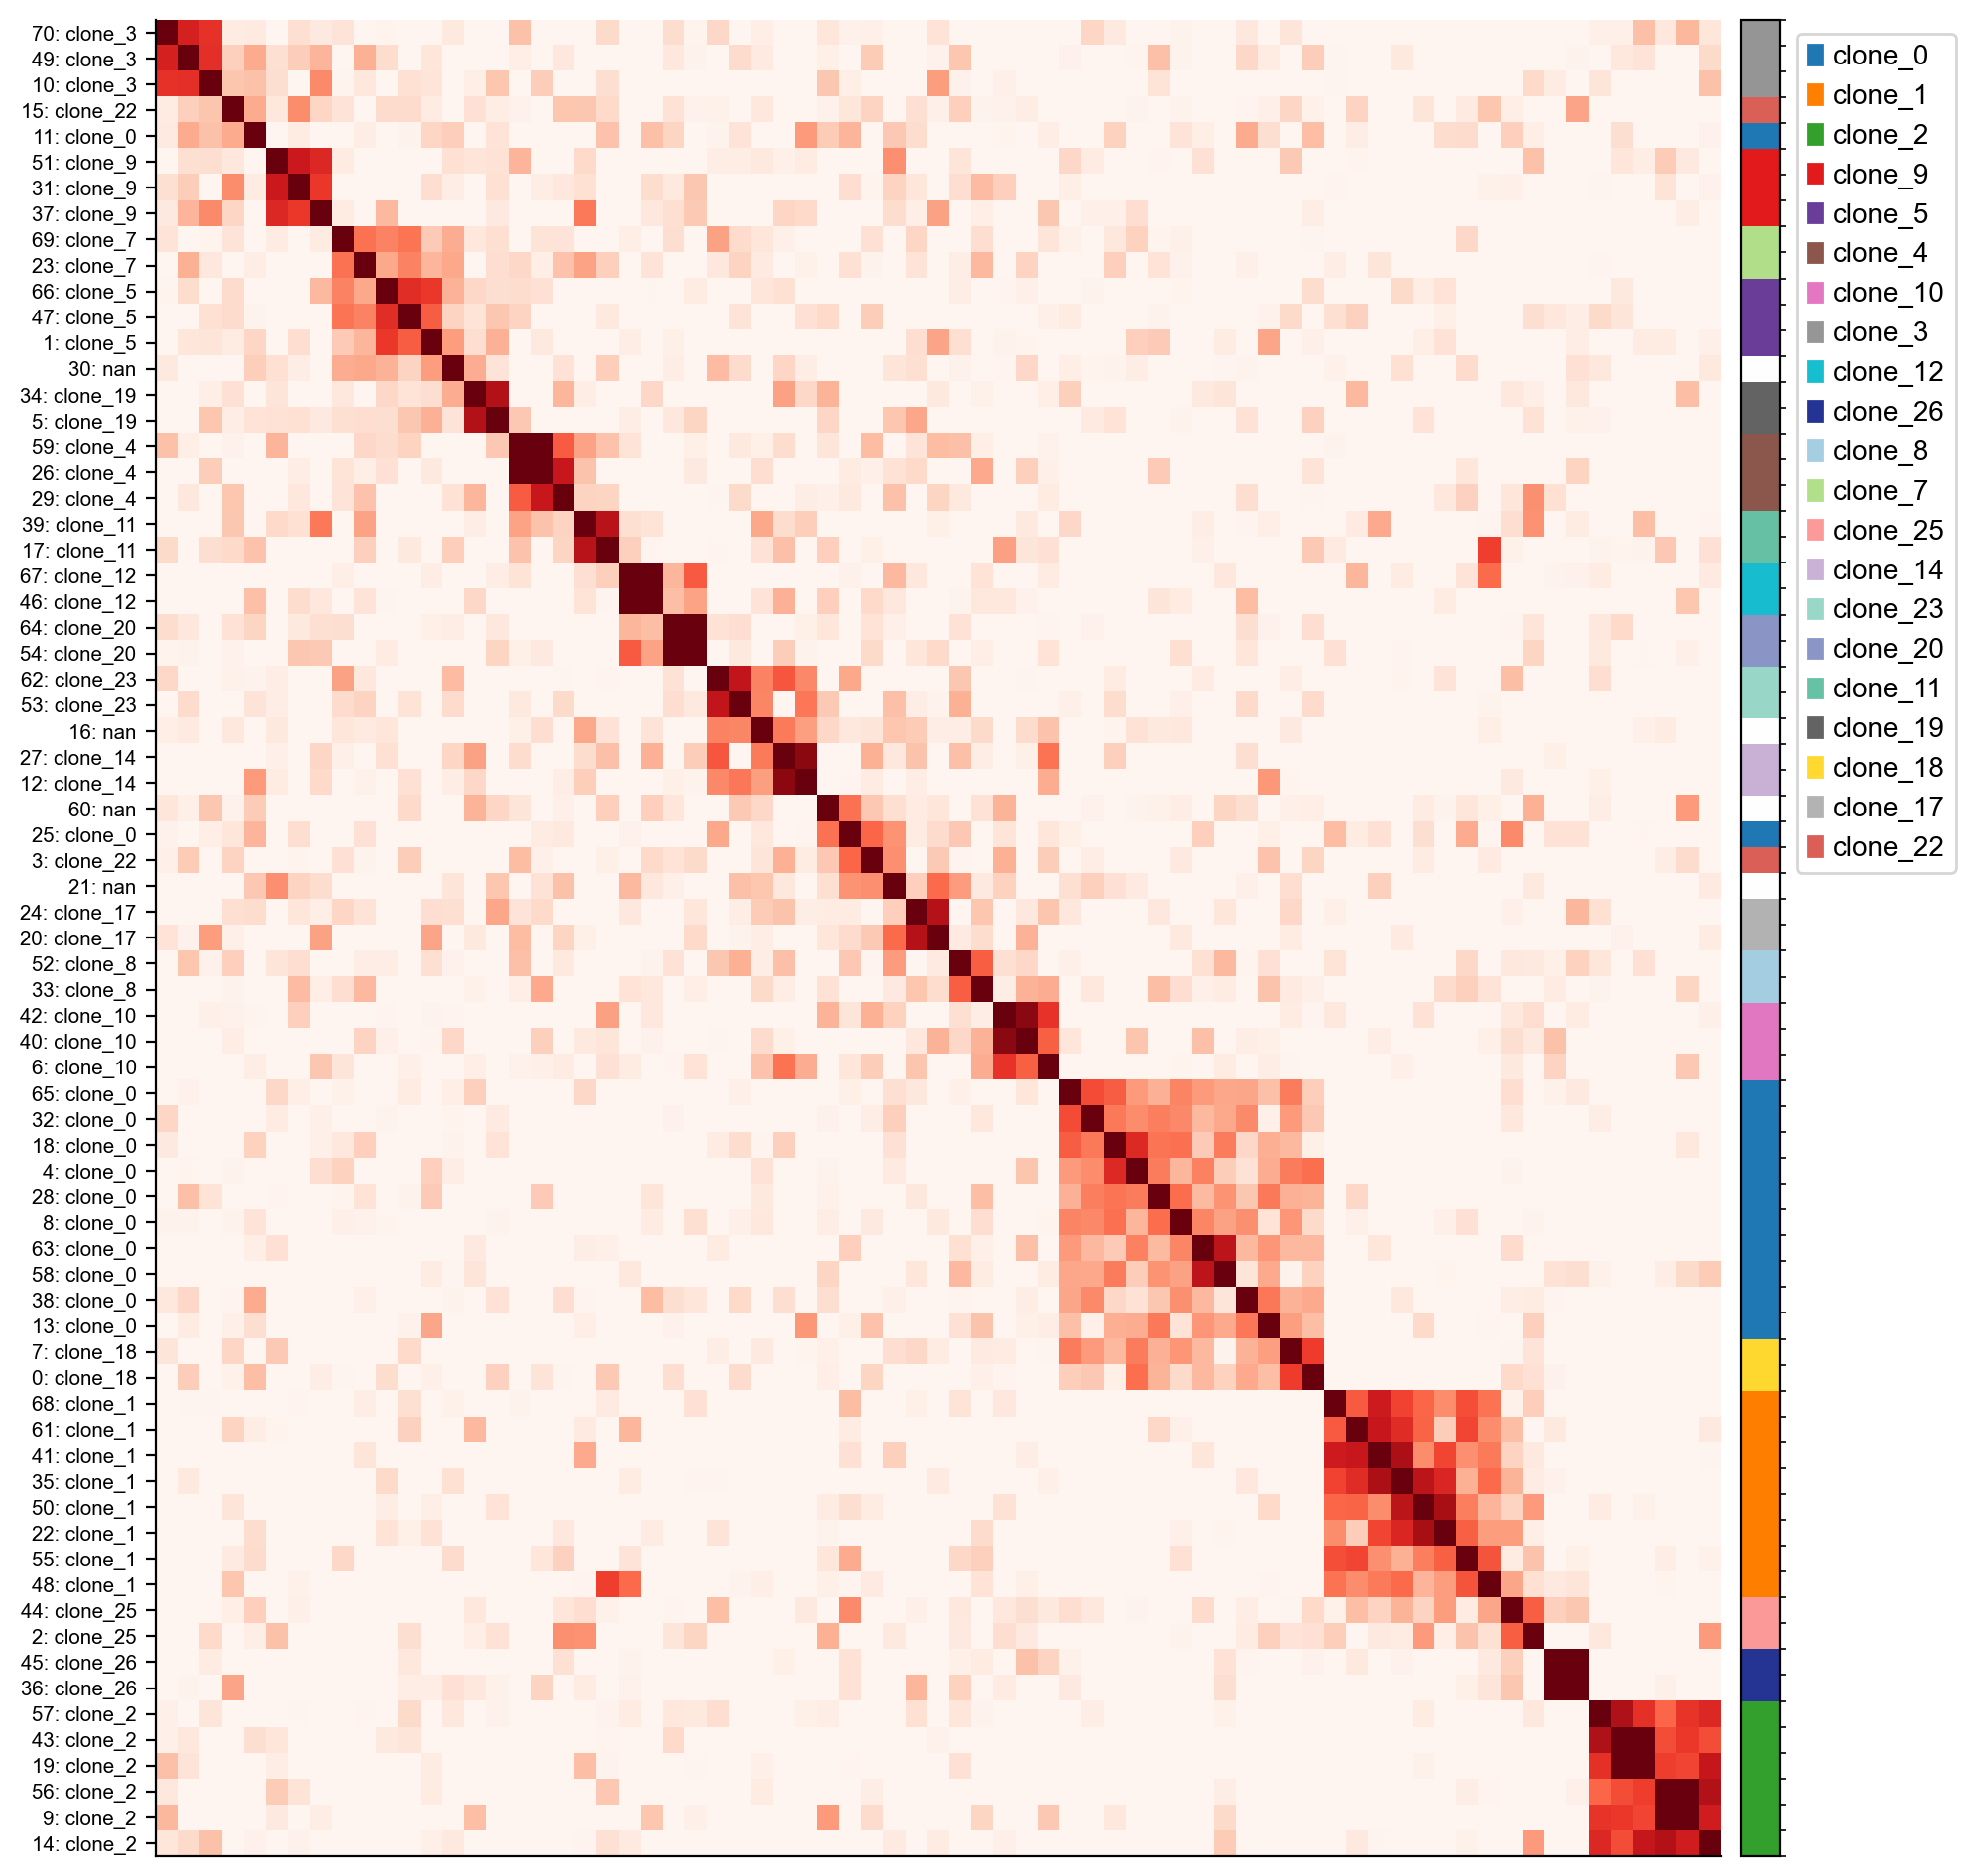

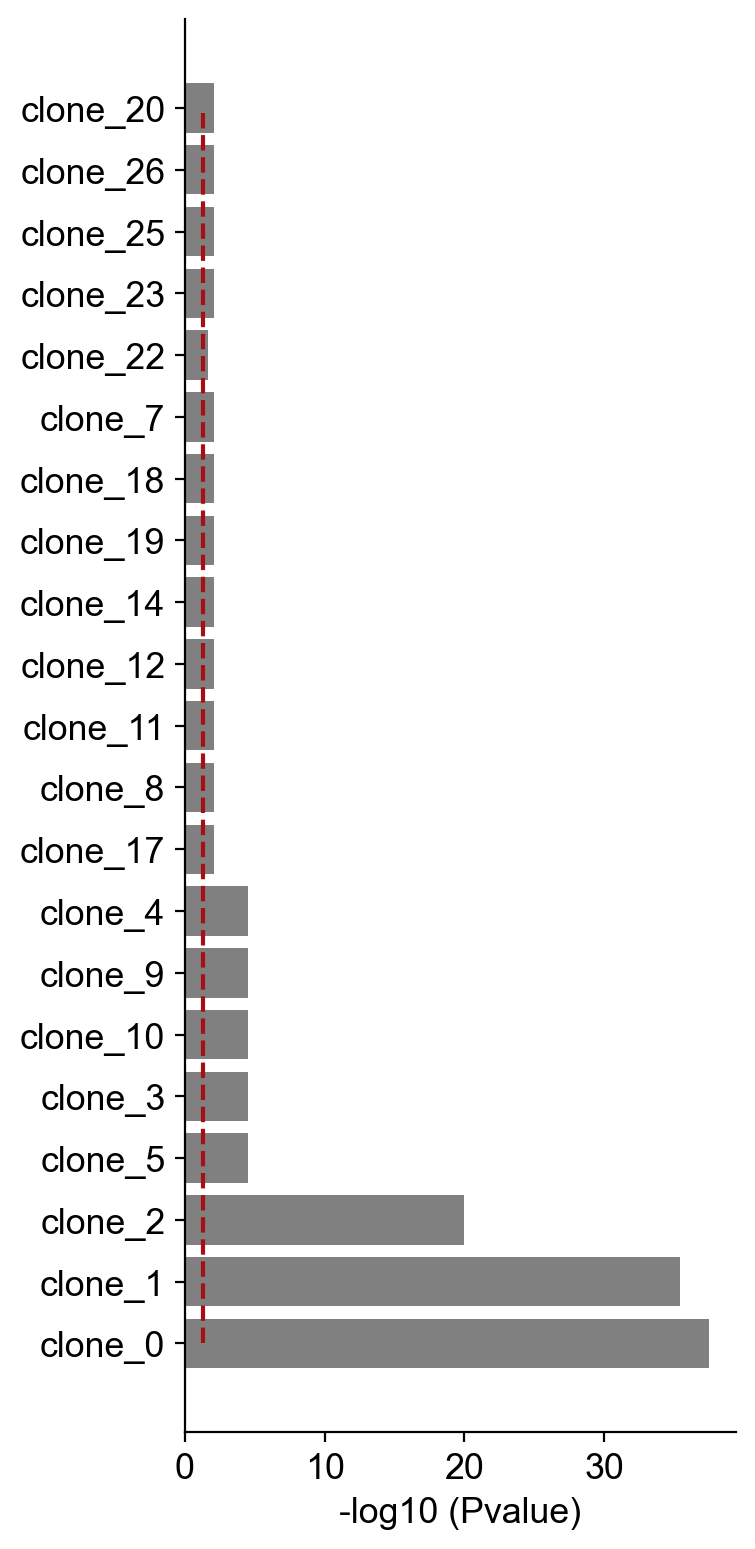

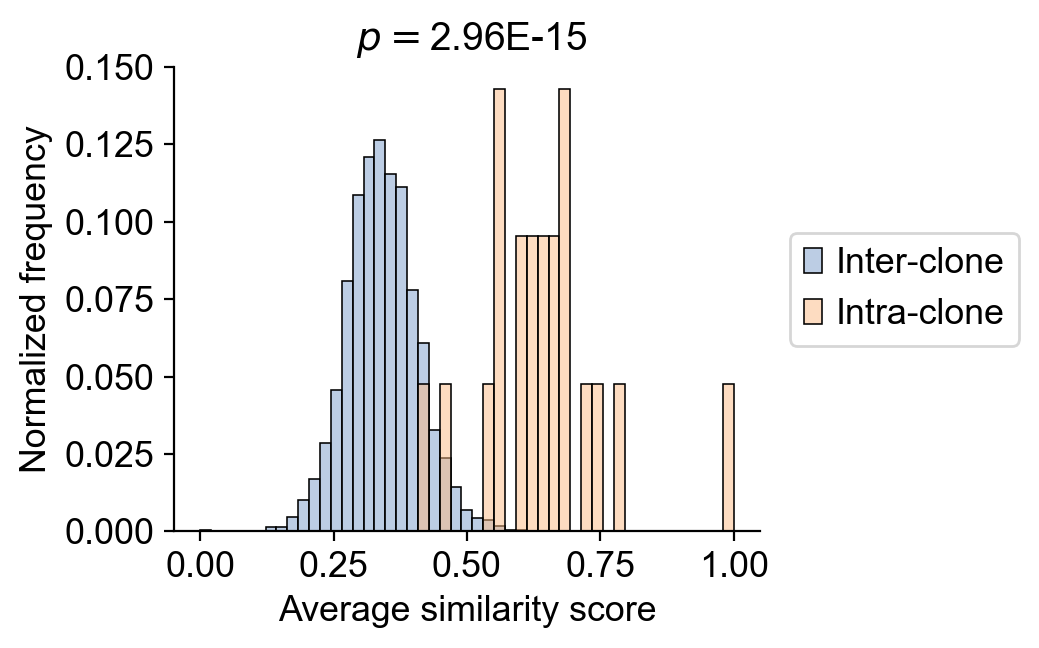

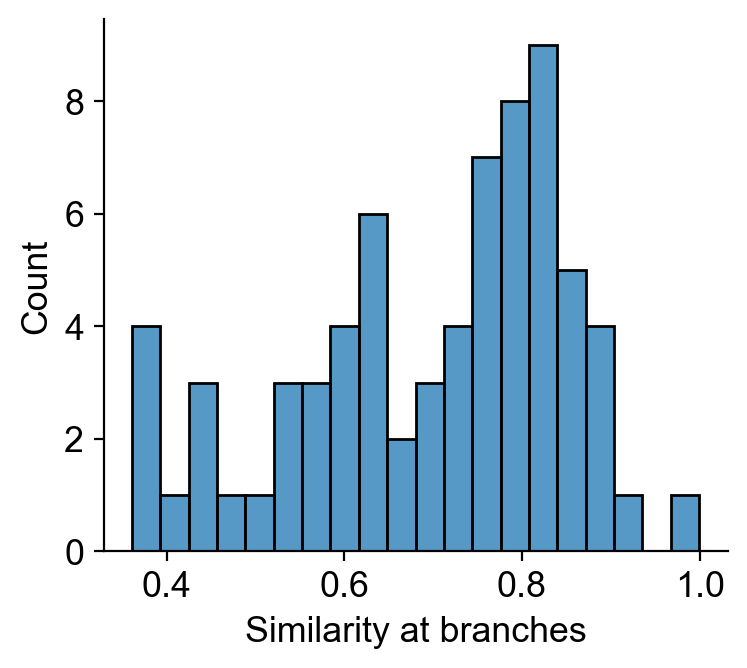

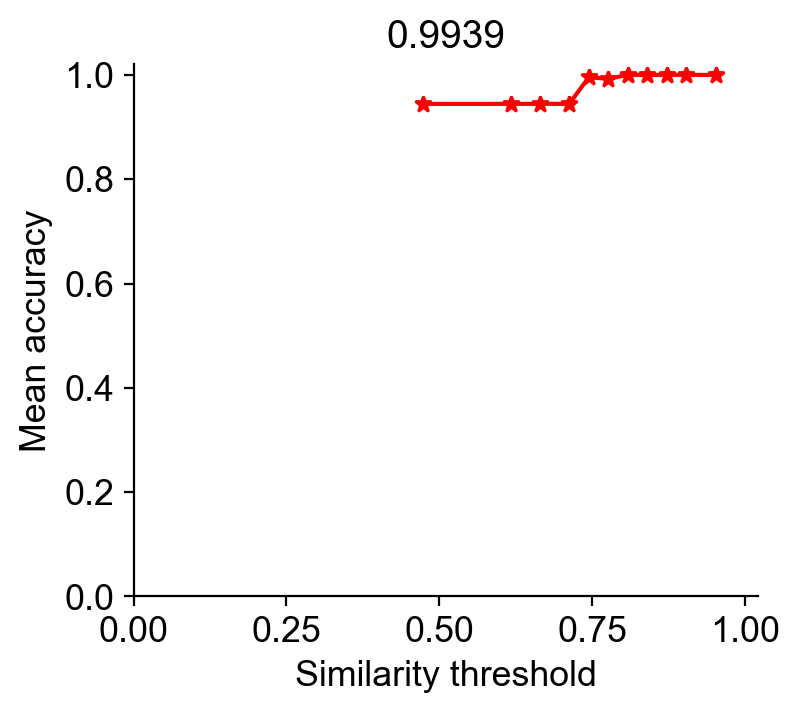

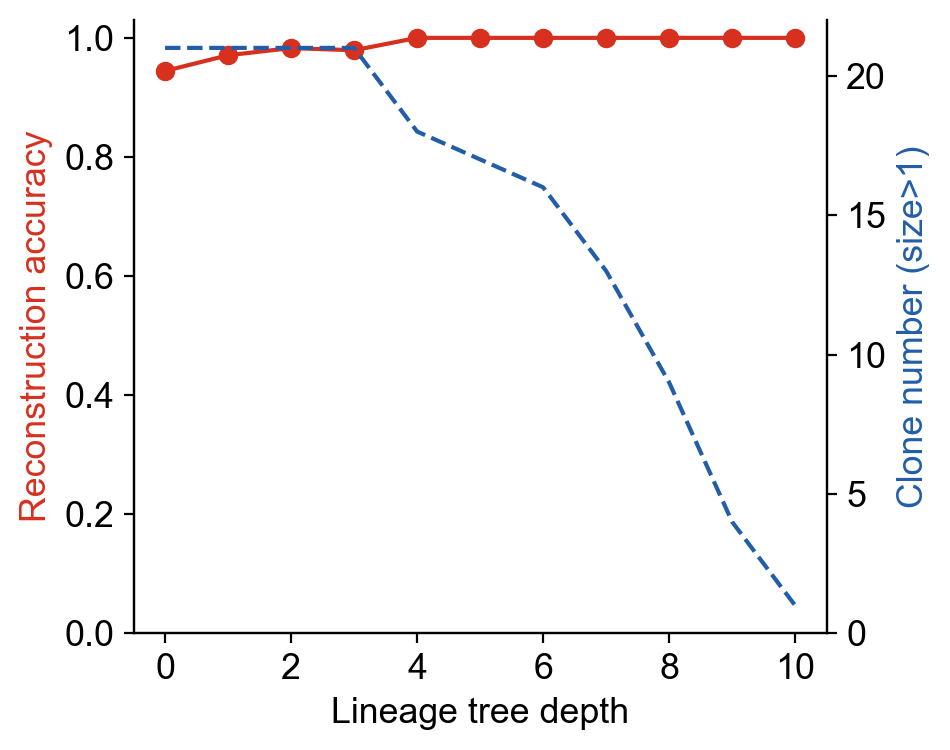

In [6]:
adata_final,my_tree=methyltree.analysis.comprehensive_lineage_analysis(out_dir,data_path,save_data_des,clone_key,adata_orig=adata,
                                                        clone_color_dict=None,#heatmap_additional_key_list=['CD150_high'],
                                                        compute_similarity=False,
                                                        update_sample_info=True,
                                                        # correct the correlation bias
                                                        similarity_correction=True,
                                                        # remove cell-type specific DNA methylation signals
                                                        remove_celltype_signal=False,cell_type_key=None,
                                                        # optimize the lineage tree
                                                        optimize_tree=False,optimize_background_cutoff=0.4,
                                                        # better heatmap visualization
                                                        heatmap_vmax_percentile=99.9,heatmap_vmin_percentile=60,heatmap_figsize=(10, 9.5),heatmap_show_label=True,
                                                        heatmap_show_legend=True,heatmap_additional_key_list=None,heatmap_fontsize=8,
                                                        # related to saving figures
                                                        fig_dir=figure_path,data_des=data_des,
                                                        # coarse-graining
                                                        perform_coarse_graining=False,coarse_grain_vmin=None,coarse_grain_figsize=(6, 5),
                                                        # infer the clones based on similarity cutoff
                                                        perform_clone_inference=False,clone_inference_threshold=0.6,
                                                        perform_memory_analysis=True,
                                                        perform_depth_analysis=True,)

Replot the heatmap using pre-computed adata. Using the additional_key_list variable to show more features

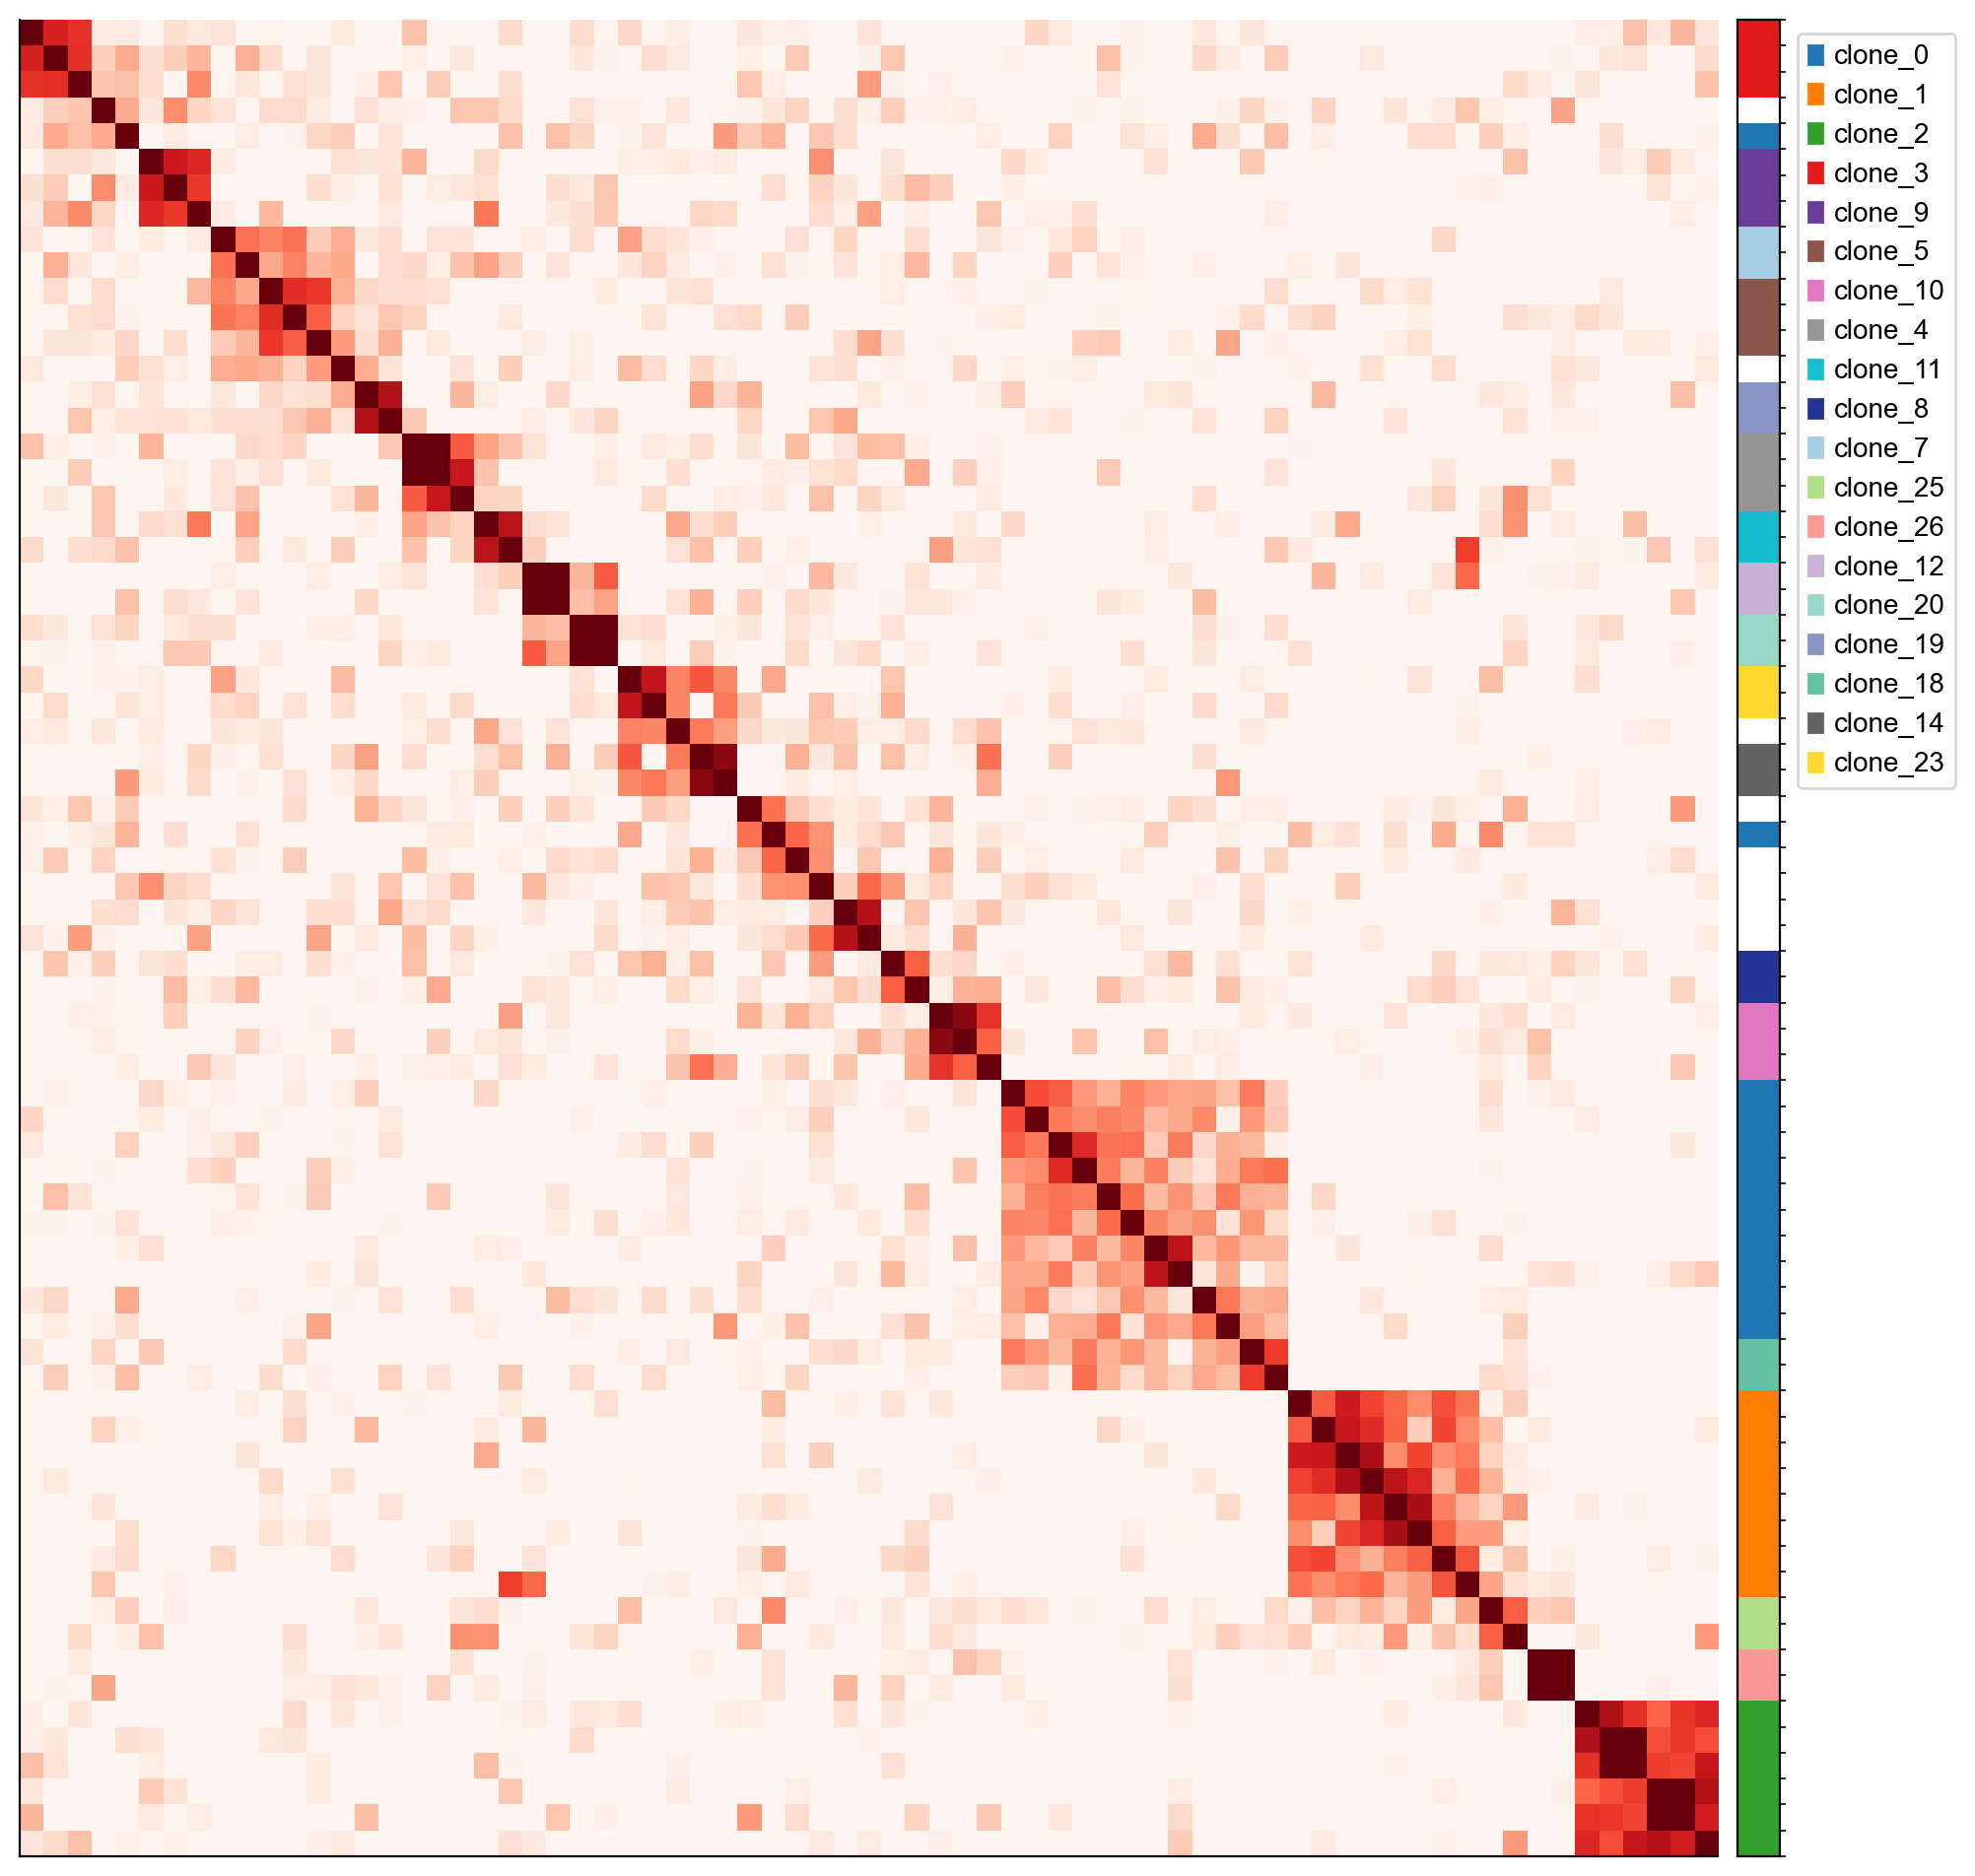

In [7]:
methyltree.plotting.plot_similarity_heatmap_with_multiple_colorbars(adata_final,additional_key_list=None,heatmap_vmax_percentile=99.9,heatmap_vmin_percentile=60,)

Time points with clonal info: []
Results saved as dictionary at adata.uns['fate_coupling_X_similarity']

      /-BM_HSC_2
   /-|
--|   \-BM_HSC_0
  |
   \-BM_HSC_1


Tree node '' (0x2bb3cdca)

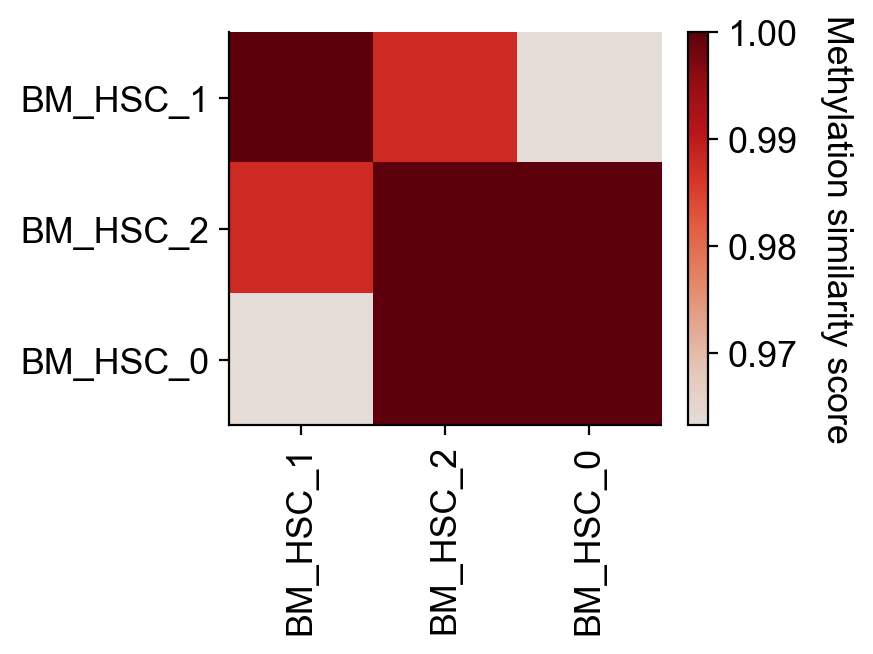

In [8]:
methyltree.analysis.coarse_grain_analysis(adata_final,clone_key='celltype',normalized_X_similarity=True)

# Downstream analysis

## Low-dimensional embedding

100%|████████████████████████████████████████████| 71/71 [00:00<00:00, 1030434.55it/s]


reorder clones
Time points with clonal info: ['0']
spectrum embedding (with normalization)
use pre-set clone order


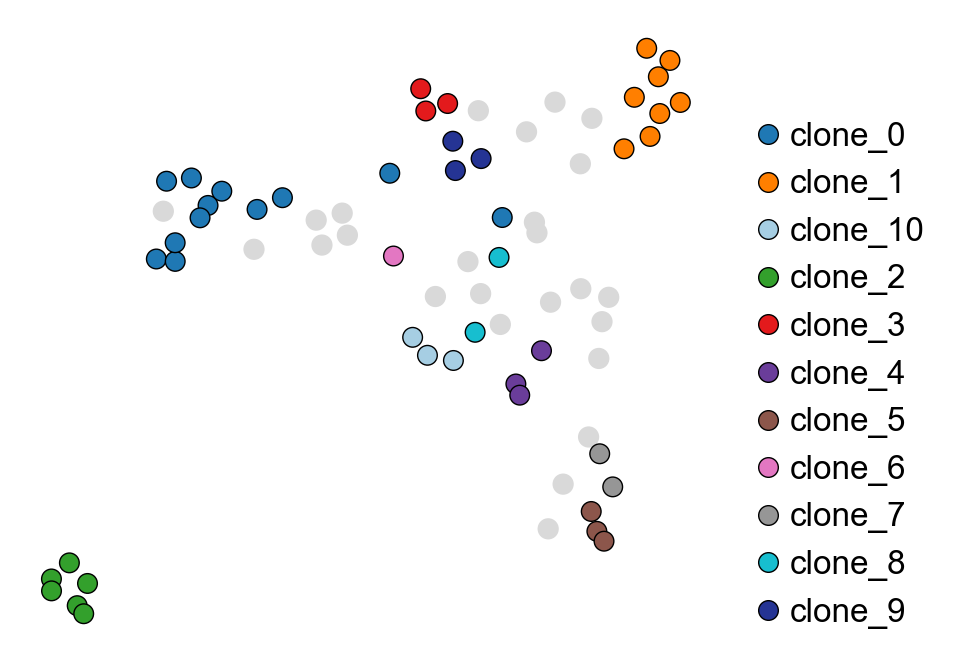

In [9]:
sel_clone_set=['clone_0','clone_1','clone_2','clone_3','clone_4','clone_5','clone_6','clone_7','clone_8','clone_9','clone_10']
adata_new=methyltree.analysis.embedding_analysis(adata_final,clone_key,
                            UMAP_parameters=[10,10,0.3],sel_clone_set=sel_clone_set,
                            clone_prefix=None,figure_path=figure_path,
                            title='',
                            fontsize=13,marker_size=50)


## Compute support value of the tree

Compute the support of the tree to estimate the robustness of each branch, which can be used to call clones later

In [10]:
methyltree.lineage.bootstrap_lineage_tree(adata_final,out_dir,
    save_data_des,
    clone_key=clone_key,
    cell_type_key=None, # this is not used unless remove_celltype_signal=True
    num_iterations=20,  
    sample_fraction=0.8,  
    similarity_correction=True,
    remove_celltype_signal=False,
    heatmap_ordering_method='UPGMA',
    recompute=False,
    cores=64)

Tree node '1.00' (0x2cc5c6f4)

## Visualize the lineage tree with support values
Better visualization requires another notebook using `viewtree` package. The leaf nodes are name as 'cell_index'\_'cell_type'\_'clone_id'

Note that this tree should have the same topology as the one computed using the full data, and used for order the similarity matrix.

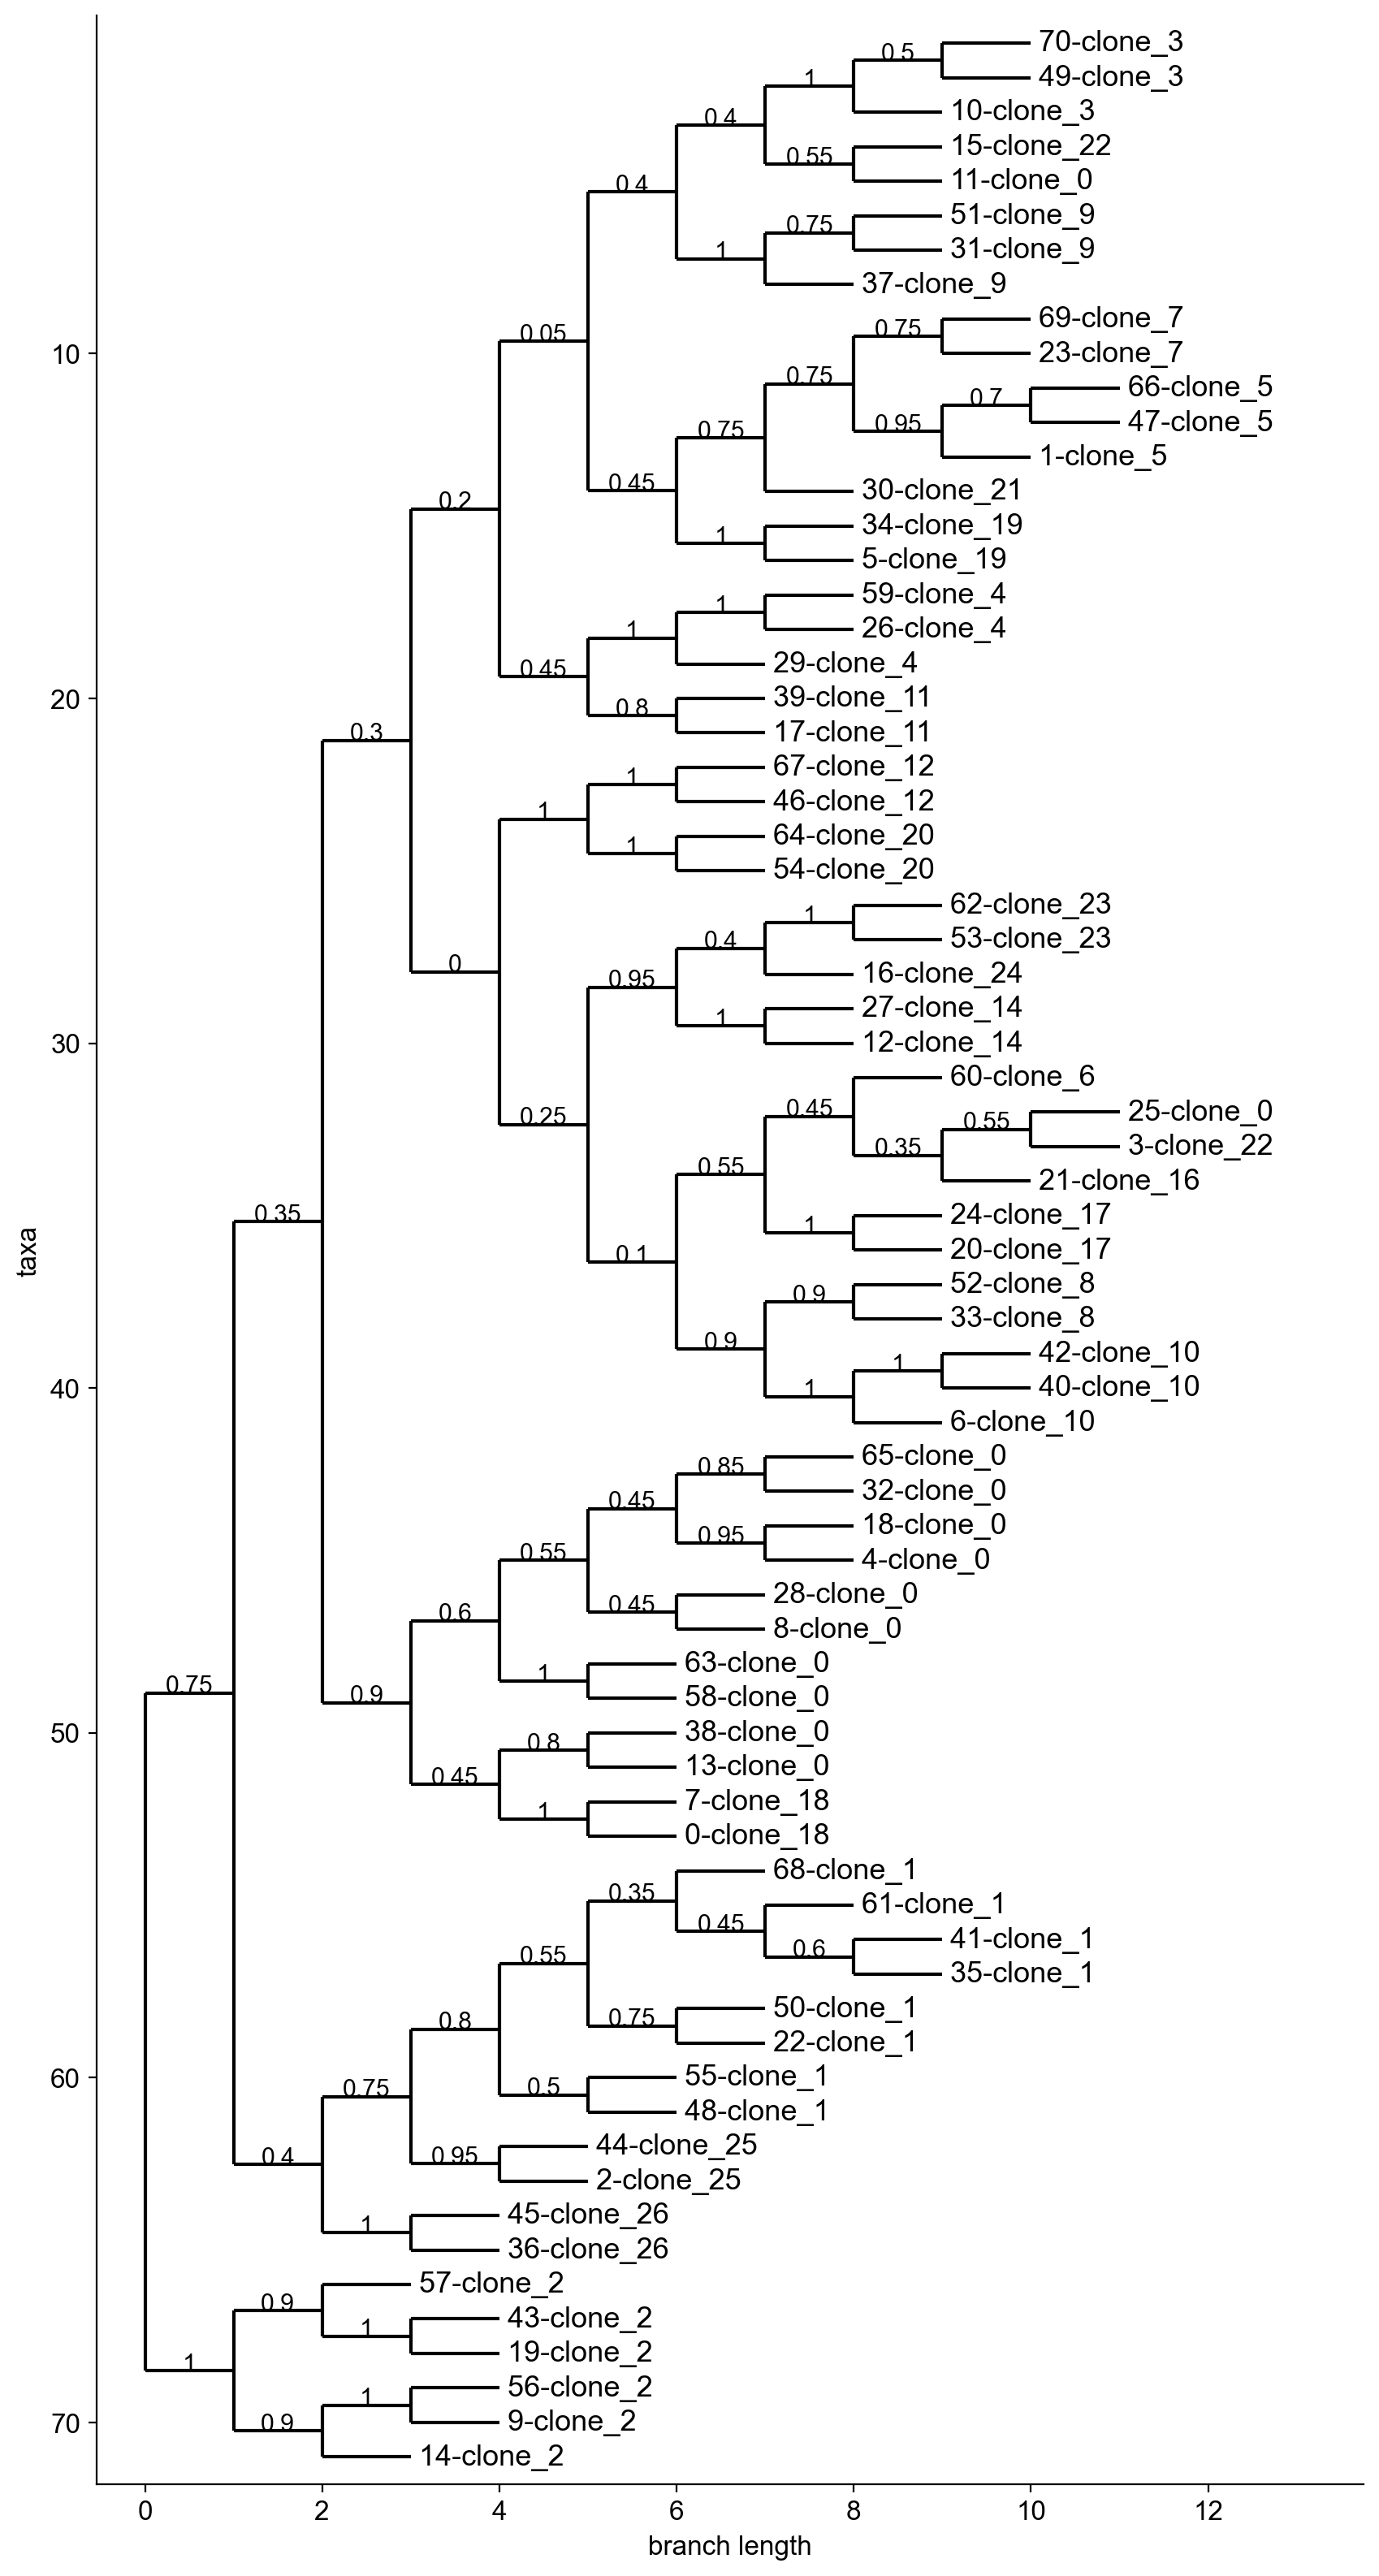

<Figure size 600x400 with 0 Axes>

In [11]:
cs.settings.set_figure_params(fontsize=13)
method='UPGMA'
my_tree_path=f"{out_dir}/lineage_tree_{clone_key}_{save_data_des}_{method}_support.txt"
methyltree.plotting.plot_tree_with_support(my_tree_path,leaf_name_map=None,figsize=(10,20))#leaf_name_map=lambda x: x.split('-')[-1],figsize=(20,50))
plt.savefig(f'{figure_path}/lineage_tree_support.pdf')

## Predict clones based on support value cutoff

method high

      /-70-clone_3
   /-|
--|   \-49-clone_3
  |
   \-10-clone_3

--15-clone_22

--11-clone_0

      /-51-clone_9
   /-|
--|   \-31-clone_9
  |
   \-37-clone_9

--69-clone_7

--23-clone_7

      /-66-clone_5
   /-|
--|   \-47-clone_5
  |
   \-1-clone_5

--30-clone_21

   /-34-clone_19
--|
   \-5-clone_19

      /-59-clone_4
   /-|
--|   \-26-clone_4
  |
   \-29-clone_4

   /-39-clone_11
--|
   \-17-clone_11

   /-67-clone_12
--|
   \-46-clone_12

   /-64-clone_20
--|
   \-54-clone_20

         /-62-clone_23
      /-|
   /-|   \-53-clone_23
  |  |
--|   \-16-clone_24
  |
  |   /-27-clone_14
   \-|
      \-12-clone_14

--60-clone_6

--25-clone_0

--3-clone_22

--21-clone_16

   /-24-clone_17
--|
   \-20-clone_17

   /-52-clone_8
--|
   \-33-clone_8

      /-42-clone_10
   /-|
--|   \-40-clone_10
  |
   \-6-clone_10

               /-65-clone_0
            /-|
           |   \-32-clone_0
         /-|
        |  |   /-18-clone_0
        |   \-|
      /-|      \-4-clone_0
     

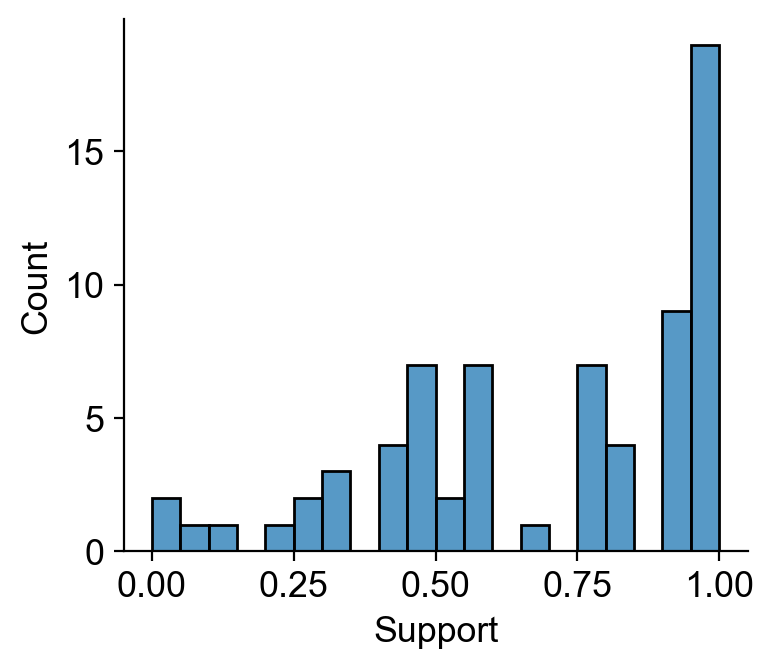

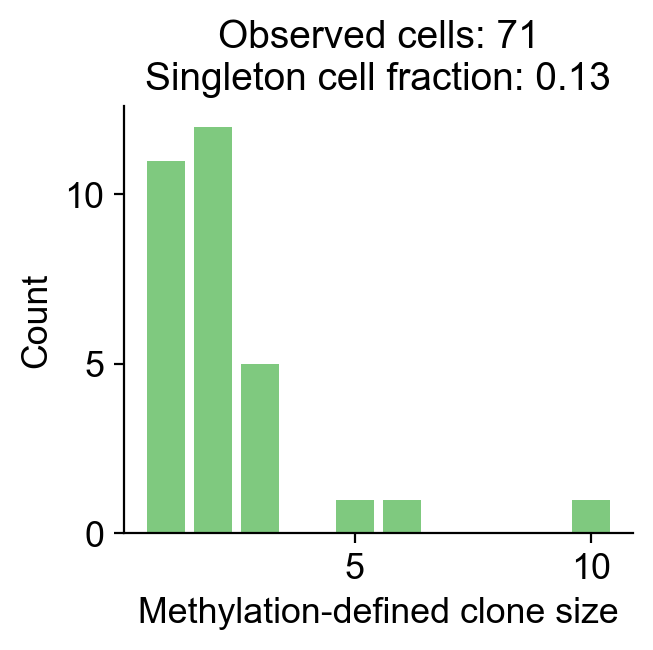

In [22]:
df_predict=methyltree.clone.identify_putative_clones_from_trees_with_support(
    my_tree_path, adata_final.obsm['X_similarity'],support_threshold=0.8, print_clone=True,similarity_percentile=75,method='high', 
)

df_predict['cell_id_new']=np.array(df_predict['cell_id'].apply(lambda x:x.split('-')[0])).astype(int)
df_predict.to_csv(f'{out_dir}/predicted_clone_size.csv')
adata_final.obs["inferred_clone"] = df_predict.sort_values("cell_id_new")[
    "predicted_clone"
].to_numpy()

singleton_fraction=np.mean(df_predict['clone_size']==1)
print(f'Singleton fraction: {singleton_fraction:.2f}')

df_freq=methyltree.clone.estimate_clone_number(adata_final, clone_key="inferred_clones")

plt.subplots(figsize=(3.5,3.5))
plt.bar(df_freq['clone_size'],df_freq['frequency'],color='#7fc97f')
plt.title(
    f"Observed cells: {adata_final.shape[0]}"+ "\n"
    +  f"Singleton cell fraction: {singleton_fraction:.2f}"
)
plt.xlabel("Methylation-defined clone size")
#plt.xticks([1,2,3,4,6,8,10,12],[1,2,3,4,6,8,10,12])
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(f'{figure_path}/methylation_clone_size_distribution.pdf')

pd.DataFrame(adata_final.obs['inferred_clone']).reset_index().rename(columns={'index':'sample'}).to_csv(f'{out_dir}/{save_data_des}_predicted_clone_size_with_sample_ID.csv')
#methy_ana.accuracy_after_removing_leaves_with_low_support(df_predict,adata,clone_key)

## Compute adjusted rank index

In [23]:
size_cutoff=1
true_labels=adata_final.obs[clone_key].to_numpy()[adata_final.uns['order_x']]
labels_pred=adata_final.obs['inferred_clone'].to_numpy()[adata_final.uns['order_x']]
df=pd.DataFrame({'true_label':true_labels,'predict_label':labels_pred}).reset_index()
valid_true_labels=df.groupby('true_label').agg({'index':'count'}).rename(columns={'index':'count'}).query(f'count>{size_cutoff}').index
valid_pred_labels=df.groupby('predict_label').agg({'index':'count'}).rename(columns={'index':'count'}).query(f'count>{size_cutoff}').index
df_sub=df[df['true_label'].isin(valid_true_labels) & df['predict_label'].isin(valid_pred_labels)]
df_sub_2=df_sub[(df_sub['true_label']!='nan') & (df_sub['predict_label']!='nan')]

frac_predicted_large_clones=len(df[df['predict_label'].isin(valid_pred_labels)])/len(df)
print(f'Fraction of cells in the non-singleton predicted clones: {frac_predicted_large_clones:.2f}')

import sklearn
ARI=sklearn.metrics.adjusted_rand_score(df_sub_2['true_label'], df_sub_2['predict_label'])
print(f'Adjusted rank index: {ARI:.2f}')

Fraction of cells in the non-singleton predicted clones: 0.87
Adjusted rank index: 0.85


## Update predicted clones to df_sample

In [24]:
df_clone_all=pd.read_csv(f'{out_dir}/{save_data_des}_predicted_clone_size_with_sample_ID.csv',index_col=0)
df_clone_all=df_clone_all.set_index('sample')
df_sample=methyltree.metadata.load_sample_info(data_path)
df_sample=df_sample.set_index('sample')
#del df_sample['inferred_clone']
df_sample['inferred_clone']=df_clone_all['inferred_clone']
df_sample=df_sample.reset_index()
methyltree.metadata.backup_and_save_sample_info(df_sample,data_path)

In [25]:
df_sample['inferred_clone'].unique()

array(['clone_0', 'clone_13', 'clone_23', 'clone_4', 'clone_8',
       'clone_11', 'clone_3', 'clone_25', 'clone_2', 'clone_6',
       'clone_24', 'clone_12', 'clone_7', 'clone_15', 'clone_21',
       'clone_1', 'clone_20', 'clone_22', 'clone_9', 'clone_19',
       'clone_5', 'clone_14', 'clone_10', 'clone_17', 'clone_16',
       'clone_26', 'clone_18'], dtype=object)

## Visualize the inferred clones on similarity heatmap

In [26]:
sc.tl.leiden(adata_final,resolution=1)

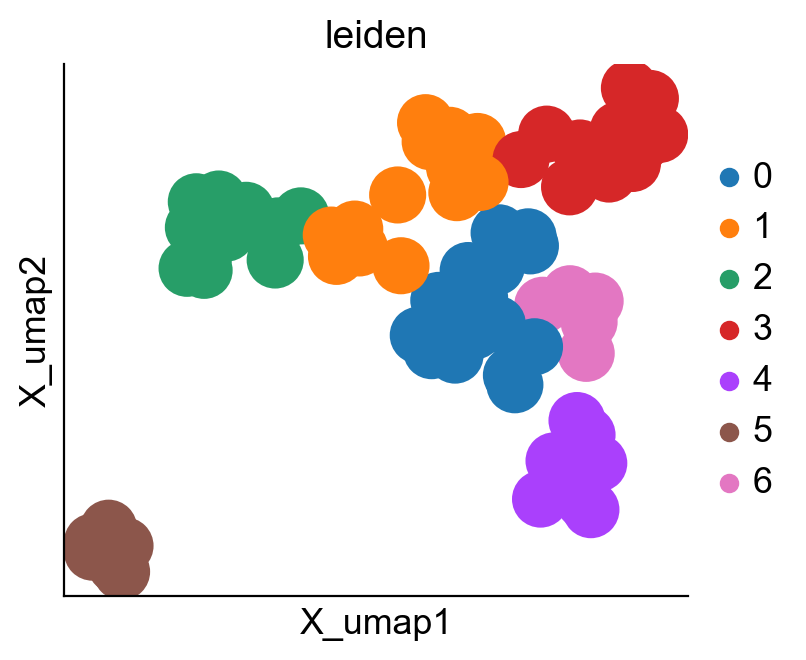

In [27]:
cs.pl.embedding(adata_final,color='leiden',basis='X_umap')

## Visualize the inferred clones on similarity heatmap

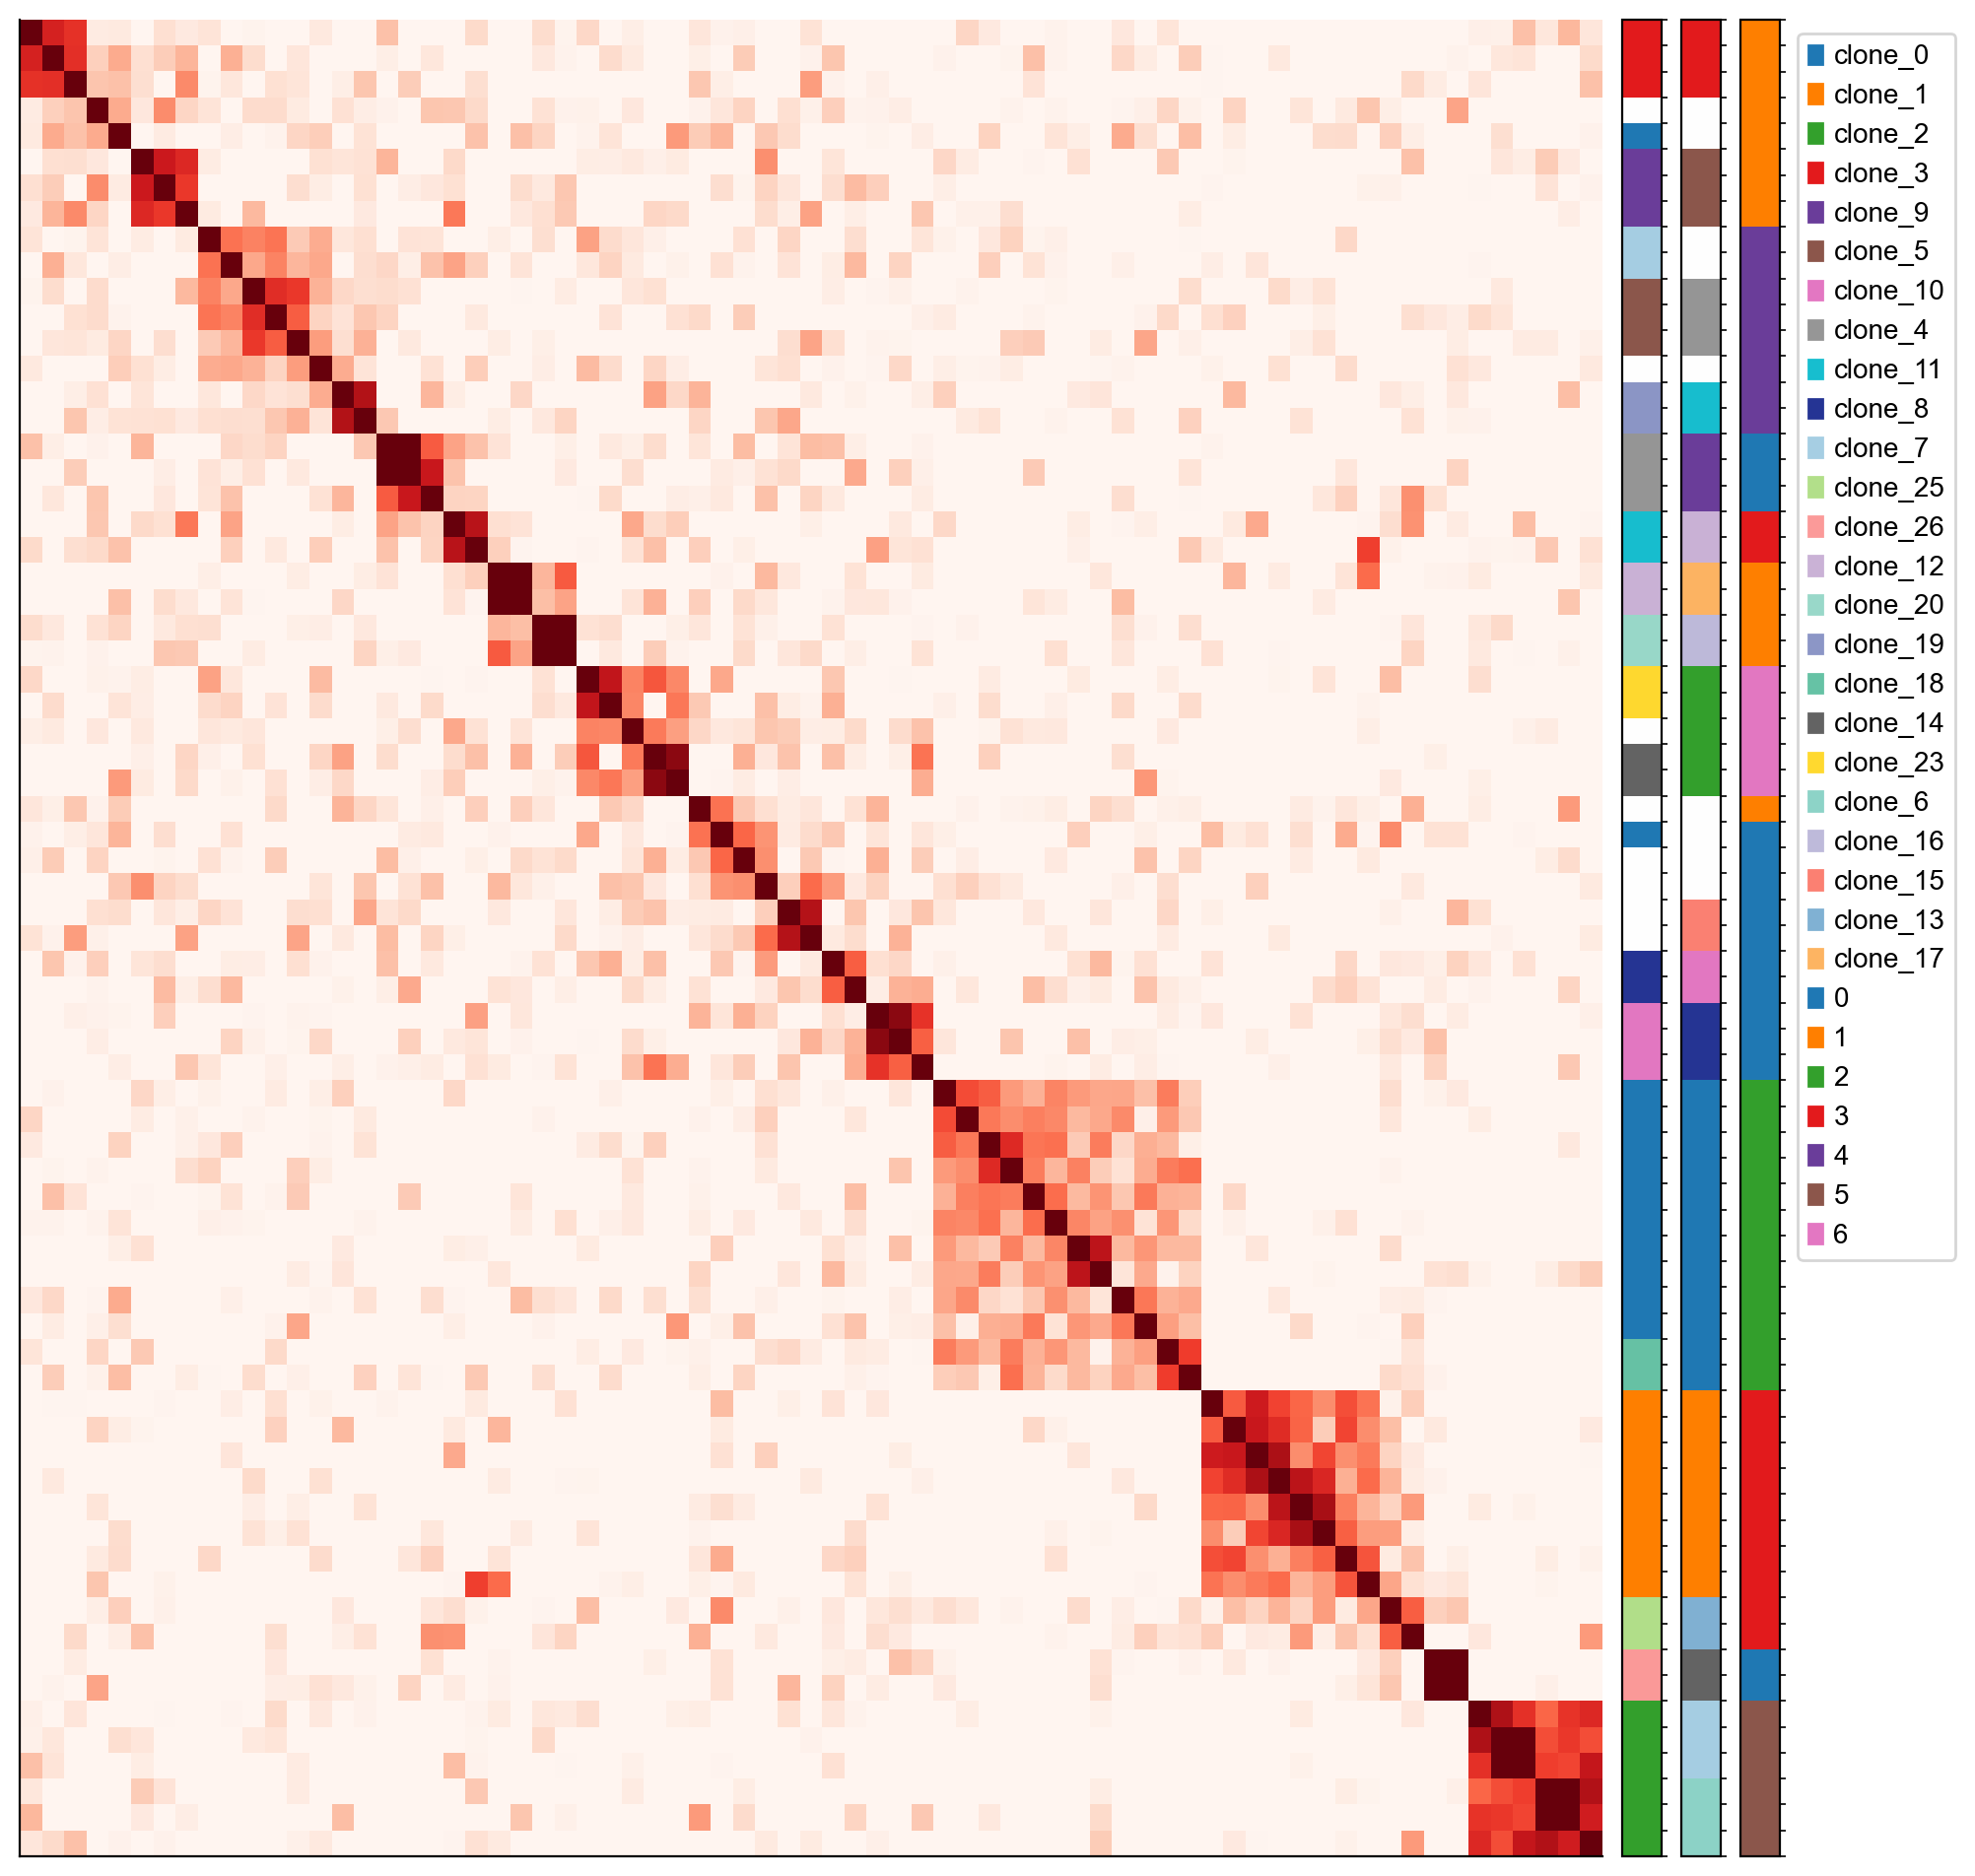

In [28]:
methyltree.plotting.plot_similarity_heatmap_with_multiple_colorbars(adata_final,additional_key_list=['inferred_clone','leiden'],heatmap_vmax_percentile=99.9,heatmap_vmin_percentile=60)

## Predict total clone number from simulation

In [29]:
import random
sample_name='test'
sample_cell_N_dict={'test':adata_final.shape[0]}
singleton_fraction_dict={'test':singleton_fraction} # using the singleton_cell fraction from the previous plot

In [30]:
df_predict=pd.read_csv(f'{out_dir}/predicted_clone_size.csv',index_col=0)
df_tmp=df_predict.filter(['predicted_clone','clone_size']).drop_duplicates().sort_values('predicted_clone')
#groupby('predicted_clone').agg({'cell_id':'count'}).reset_index()
clone_size_array=df_tmp['clone_size'].to_list()


clone_size=10
sampled_cell_N=sample_cell_N_dict[sample_name]
predicted_clone_list=[]
singleton_list=[]


N_c_array=np.arange(20,400,20)


for N_c in N_c_array:
    ###############
    singleton_tmp_list=[]
    predicted_clone_tmp_list=[]
    for _ in range(100):
        data_list=[]
        clone_size_array_tmp=clone_size*np.random.choice(clone_size_array,N_c,replace=True)
        for i in range(0,N_c):
            tmp=np.zeros(clone_size_array_tmp[i]).astype(int)+i
            data_list.append(tmp.astype(str))
        final_data=np.hstack(data_list)
        #random.sample(final_data,10)
        sampled_data=np.random.choice(final_data, sampled_cell_N, replace=True)
        df=pd.DataFrame({'clone_id':sampled_data}).reset_index().groupby('clone_id').agg({'index':'count'}).reset_index().rename(columns={'index':'clone_size'}).sort_values('clone_size',ascending=False)
        singleton_fraction_tmp=np.sum(df['clone_size']==1)/df['clone_size'].sum()
        #print(f'Singleton_fraction: {singleton_fraction:.2f}')

        predicted_clone_N=sampled_cell_N/(2*(1-singleton_fraction_tmp)**1.5)
        singleton_tmp_list.append(singleton_fraction_tmp)
        predicted_clone_tmp_list.append(predicted_clone_N)
    predicted_clone_list.append(predicted_clone_tmp_list)
    singleton_list.append(singleton_tmp_list)

np.savez(f'{out_dir}/saved_sampling_clone_data_sampled_cell_N{sampled_cell_N}.npz',N_c_array=N_c_array,singleton_list=np.array(singleton_list))

Sample name: test; cell number: 71; singleton_frac: 0.1267605633802817; Predicted output value: 27.4643643645704


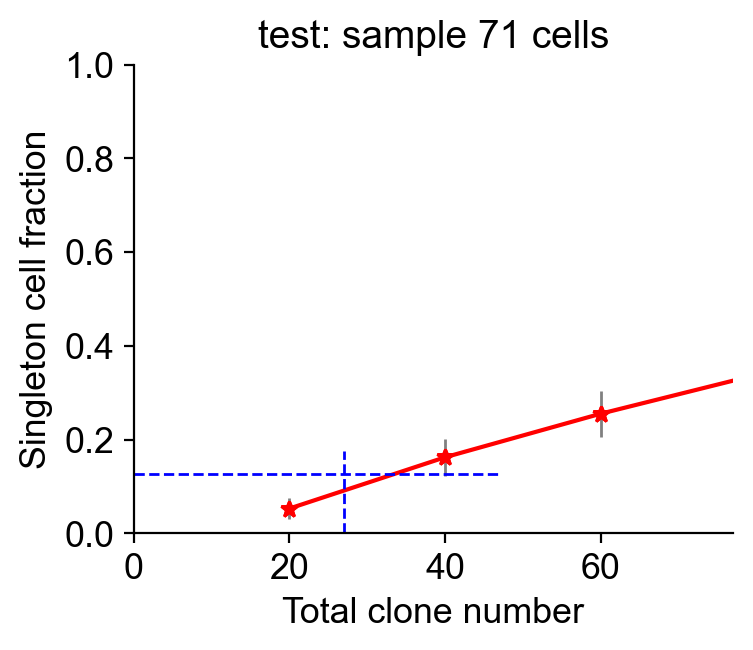

In [31]:
cs.settings.set_figure_params(format='pdf',figsize=[4,3.5],fontsize=14)

sampled_cell_N=sample_cell_N_dict[sample_name]
file=np.load(f'{out_dir}/saved_sampling_clone_data_sampled_cell_N{sampled_cell_N}.npz')
N_c_array=file['N_c_array']
singleton_list=file['singleton_list']

from sklearn.linear_model import LinearRegression

# Create training data
target_singleton=singleton_fraction_dict[sample_name]
df_tmp=pd.DataFrame({'singleton':list(np.mean(singleton_list,1))+[target_singleton],'clone_N':list(N_c_array)+[np.nan]}).sort_values('singleton')
target_id=np.nonzero(np.array(df_tmp['singleton']==target_singleton))[0][0]
if target_id+2 > df_tmp.shape[0]:
    raise ValueError(f"target_id: {target_id}; df_tmp.shape[0]: {df_tmp.shape[0]}. Please Increased upper limit of N_c_array")
df_train=df_tmp.iloc[[target_id-2,target_id-1,target_id+1,target_id+2]]
X_train=[[x] for x in df_train['singleton'].to_numpy()]
y_train=df_train['clone_N'].to_list()

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# X_new is the observed singleton fraction
singleton_frac=singleton_fraction_dict[sample_name]
X_new = [[singleton_frac]]

    
# Predict the output value
y_pred = model.predict(X_new)
estimated_clone_N=int(y_pred[0])

print(f"Sample name: {sample_name}; cell number: {sampled_cell_N}; singleton_frac: {X_new[0][0]}; Predicted output value:", y_pred[0])


plt.subplots(figsize=(4,3.5))
#plt.plot(N_c_array,np.array(singleton_list),'.',color='grey')
# rcParams["axes.spines.right"] = False
# rcParams["axes.spines.top"] = False
error_array=np.array([np.std(x) for x in np.array(singleton_list)])
plt.errorbar(N_c_array,np.mean(singleton_list,1),
             yerr=error_array,marker='*',color='r',
            ecolor='grey',elinewidth=1,linestyle ='')

plt.plot(N_c_array,np.mean(singleton_list,1),'-*r')

plt.xlim([0,estimated_clone_N+50])
plt.ylim([0,1])
plt.xlabel('Total clone number')
plt.ylabel('Singleton cell fraction')

plt.plot([0,estimated_clone_N+20],[singleton_frac,singleton_frac],'--b',linewidth=1)
plt.plot([estimated_clone_N,estimated_clone_N],[0,singleton_frac+0.05],'--b',linewidth=1)
plt.title(f'{sample_name}: sample {sampled_cell_N} cells')
plt.tight_layout()
plt.savefig(f'{figure_path}/{sample_name}_clone_number_prediction.pdf')